In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [56]:
# Loading data

train_data  = pd.read_csv('/content/sample_data/train.csv')
test_data   = pd.read_csv('/content/sample_data/test.csv')

# print (test_data.shape)
# print(train_data)

common_columns = train_data.columns.intersection(test_data.columns)
print (common_columns)

train_data_x = train_data[common_columns]
print (train_data_x)

Index(['id', 'Basic_Demos-Enroll_Season', 'Basic_Demos-Age', 'Basic_Demos-Sex',
       'CGAS-Season', 'CGAS-CGAS_Score', 'Physical-Season', 'Physical-BMI',
       'Physical-Height', 'Physical-Weight', 'Physical-Waist_Circumference',
       'Physical-Diastolic_BP', 'Physical-HeartRate', 'Physical-Systolic_BP',
       'Fitness_Endurance-Season', 'Fitness_Endurance-Max_Stage',
       'Fitness_Endurance-Time_Mins', 'Fitness_Endurance-Time_Sec',
       'FGC-Season', 'FGC-FGC_CU', 'FGC-FGC_CU_Zone', 'FGC-FGC_GSND',
       'FGC-FGC_GSND_Zone', 'FGC-FGC_GSD', 'FGC-FGC_GSD_Zone', 'FGC-FGC_PU',
       'FGC-FGC_PU_Zone', 'FGC-FGC_SRL', 'FGC-FGC_SRL_Zone', 'FGC-FGC_SRR',
       'FGC-FGC_SRR_Zone', 'FGC-FGC_TL', 'FGC-FGC_TL_Zone', 'BIA-Season',
       'BIA-BIA_Activity_Level_num', 'BIA-BIA_BMC', 'BIA-BIA_BMI',
       'BIA-BIA_BMR', 'BIA-BIA_DEE', 'BIA-BIA_ECW', 'BIA-BIA_FFM',
       'BIA-BIA_FFMI', 'BIA-BIA_FMI', 'BIA-BIA_Fat', 'BIA-BIA_Frame_num',
       'BIA-BIA_ICW', 'BIA-BIA_LDM', 'BIA-BIA_LST'

In [39]:
train_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Basic_Demos-Age,3960.0,10.433586,3.574648,5.0,8.00000,10.000000,13.000000,22.000000
Basic_Demos-Sex,3960.0,0.372727,0.483591,0.0,0.00000,0.000000,1.000000,1.000000
CGAS-CGAS_Score,2421.0,65.454771,22.341862,25.0,59.00000,65.000000,75.000000,999.000000
Physical-BMI,3022.0,19.331929,5.113934,0.0,15.86935,17.937682,21.571244,59.132048
Physical-Height,3027.0,55.946713,7.473764,33.0,50.00000,55.000000,62.000000,78.500000
...,...,...,...,...,...,...,...,...
PCIAT-PCIAT_Total,2736.0,27.896199,20.338853,0.0,12.00000,26.000000,41.000000,93.000000
SDS-SDS_Total_Raw,2609.0,41.088923,10.427433,17.0,33.00000,39.000000,46.000000,96.000000
SDS-SDS_Total_T,2606.0,57.763622,13.196091,38.0,47.00000,55.000000,64.000000,100.000000
PreInt_EduHx-computerinternet_hoursday,3301.0,1.060588,1.094875,0.0,0.00000,1.000000,2.000000,3.000000


In [40]:
# train_data.info()
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3960 entries, 0 to 3959
Data columns (total 82 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   id                                      3960 non-null   object 
 1   Basic_Demos-Enroll_Season               3960 non-null   object 
 2   Basic_Demos-Age                         3960 non-null   int64  
 3   Basic_Demos-Sex                         3960 non-null   int64  
 4   CGAS-Season                             2555 non-null   object 
 5   CGAS-CGAS_Score                         2421 non-null   float64
 6   Physical-Season                         3310 non-null   object 
 7   Physical-BMI                            3022 non-null   float64
 8   Physical-Height                         3027 non-null   float64
 9   Physical-Weight                         3076 non-null   float64
 10  Physical-Waist_Circumference            898 non-null    floa

In [41]:
train_data['sii'].value_counts()

,count
sii,
0.0,1594
1.0,730
2.0,378
3.0,34


In [57]:
threshold = 0.4 * len(train_data_x)
print (threshold)
columns_with_data = train_data_x.columns[train_data_x.isnull().sum() < threshold]
print (len(columns_with_data))
train_data_x = train_data_x[columns_with_data]
# # Replace all missing values with 0
# train_data = train_data.fillna(0)
# print (train_data.shape)

print (train_data_x)


1584.0
19
            id Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0     00008ff9                      Fall                5                0   
1     000fd460                    Summer                9                0   
2     00105258                    Summer               10                1   
3     00115b9f                    Winter                9                0   
4     0016bb22                    Spring               18                1   
...        ...                       ...              ...              ...   
3955  ff8a2de4                      Fall               13                0   
3956  ffa9794a                    Winter               10                0   
3957  ffcd4dbd                      Fall               11                0   
3958  ffed1dd5                    Spring               13                0   
3959  ffef538e                    Spring               11                0   

     CGAS-Season  CGAS-CGAS_Score Physical-Season  Ph

In [58]:
# Identify categorical columns for seasons
season_cols = [
    'Basic_Demos-Enroll_Season',
    'CGAS-Season',
    'Physical-Season',
    'FGC-Season',
    'BIA-Season',
    'PCIAT-Season',
    'SDS-Season',
    'PreInt_EduHx-Season',
    'Fitness_Endurance-Season',
    'PAQ_A-Season',
    'PAQ_C-Season'
]


# Identify columns with missing values
missing_columns = train_data_x.columns[train_data_x.isnull().any()]

# Fill missing values in categorical and numerical columns
for col in missing_columns:
    print(col)
    if col == 'sii':
      break
    if train_data_x[col].dtype == 'object':  # Categorical columns (strings or objects)
        train_data_x[col] = train_data_x[col].fillna(train_data_x[col].mode()[0])  # Fill with mode (most frequent value)
    else:  # Numerical columns (integers, floats)
       train_data_x[col] = train_data_x[col].fillna(train_data_x[col].median())  # Fill with median for numerical columns
       print (col)

# Create a mapping dictionary for seasons
season_mapping = {
    'Spring': 0,
    'Summer': 1,
    'Fall': 2,
    'Winter': 3
}
# Apply manual encoding to the categorical columns
for col in season_cols:
    if col in train_data_x.columns:
        train_data_x[col] = train_data_x[col].replace(season_mapping)
# print (train_data)
# # Impute NaN values in season columns with the mode (most frequent value)

print (train_data_x)

CGAS-Season
CGAS-CGAS_Score
CGAS-CGAS_Score
Physical-Season
Physical-BMI
Physical-BMI
Physical-Height
Physical-Height
Physical-Weight
Physical-Weight
Physical-Diastolic_BP
Physical-Diastolic_BP
Physical-HeartRate
Physical-HeartRate
Physical-Systolic_BP
Physical-Systolic_BP
FGC-Season
SDS-Season
SDS-SDS_Total_Raw
SDS-SDS_Total_Raw
SDS-SDS_Total_T
SDS-SDS_Total_T
PreInt_EduHx-Season
PreInt_EduHx-computerinternet_hoursday
PreInt_EduHx-computerinternet_hoursday
            id  Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0     00008ff9                          2                5                0   
1     000fd460                          1                9                0   
2     00105258                          1               10                1   
3     00115b9f                          3                9                0   
4     0016bb22                          0               18                1   
...        ...                        ...              ...      

<ipython-input-58-b36621732072>:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  train_data_x[col] = train_data_x[col].replace(season_mapping)


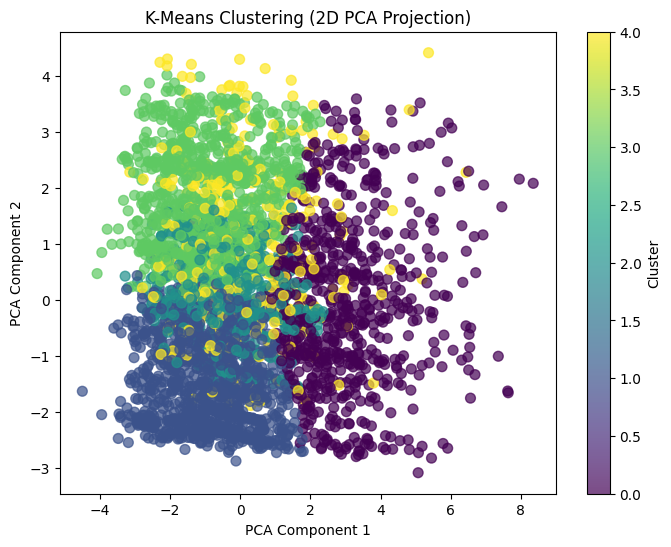

In [59]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Separate features and target
# print (train_data_cleaned)

features = train_data_x.drop(columns=["id"])  # Drop target and ID columns

# Step 3: Scale features for clustering
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Step 4: Apply K-Means Clustering
kmeans = KMeans(n_clusters=5, random_state=42)
train_data_x['cluster'] = kmeans.fit_predict(scaled_features)

# Add cluster labels as a new feature
# Step 5: Reduce dimensionality for visualization using PCA
pca = PCA(n_components=0.95)
pca_components = pca.fit_transform(scaled_features)

plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=train_data_x['cluster'], cmap='viridis', s=50, alpha=0.7)
plt.colorbar(label='Cluster')
plt.title('K-Means Clustering (2D PCA Projection)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

In [60]:
# Get the intersection of columns in train_data_cleaned and test_data
# common_columns = train_data_cleaned.columns.intersection(test_data.columns)
# Prepare the feature matrix X and target vector y

train_data_x = pd.DataFrame(train_data_x)

# Assuming 'train_data' is already a DataFrame and contains the 'sii' column
train_data_x['sii'] = train_data['sii']

for cluster in train_data_x['cluster'].unique():
    # Calculate the mode of the target for the current cluster
    cluster_mode = train_data_x[train_data_x['cluster'] == cluster]['sii'].mode()

    if not cluster_mode.empty:  # Ensure mode calculation succeeded
        # Impute missing target values with the mode
        train_data_x.loc[(train_data_x['cluster'] == cluster) & (train_data_x['sii'].isna()), 'sii'] = cluster_mode[0]

y = train_data_x['sii']
# train_data = train_data.drop(columns=['cluster'])
# print(train_data)
X = train_data_x.drop(columns=['id'])
print (X)


      Basic_Demos-Enroll_Season  Basic_Demos-Age  Basic_Demos-Sex  \
0                             2                5                0   
1                             1                9                0   
2                             1               10                1   
3                             3                9                0   
4                             0               18                1   
...                         ...              ...              ...   
3955                          2               13                0   
3956                          3               10                0   
3957                          2               11                0   
3958                          0               13                0   
3959                          0               11                0   

      CGAS-Season  CGAS-CGAS_Score  Physical-Season  Physical-BMI  \
0               3             51.0                2     16.877316   
1               0             65.

In [61]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [48]:
# Feature Scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [62]:
# Apply PCA
pca = PCA(n_components=0.95)  # Keep 95% of the variance
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [63]:
import xgboost as xgb
import numpy as np
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Initialize XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=200,      # Number of boosting rounds
    learning_rate=0.05,     # Step size shrinking to avoid overfitting
    max_depth=3,           # Maximum depth of individual trees
    subsample=0.8,         # Fraction of samples used for fitting each tree
    colsample_bytree=0.8   # Fraction of features used for fitting each tree
)

# Train the model
model.fit(X_train_pca, y_train)

# Predict on the test set
y_pred = model.predict(X_test_pca)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
print(accuracy_score(y_test, y_pred))

# Feature importance
print("Feature Importances:")
print(model.feature_importances_)


0.9318181818181818
Feature Importances:
[0.078553   0.09450361 0.05997612 0.03156699 0.06978497 0.07372567
 0.13166527 0.08515749 0.02669794 0.03972667 0.13008416 0.06100831
 0.08047082 0.01928546 0.01779347]


In [64]:
# Instantiate the Model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42,
                                  max_depth=10,
                                  min_samples_split=10,
                                  min_samples_leaf=4)

In [65]:
# Fit the Model on PCA-transformed data
rf_model.fit(X_train_pca, y_train)

RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [66]:
# Make predictions on the test set
y_pred = rf_model.predict(X_test_pca)
# Generate a classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))
# Generate a confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
# Calculate the accuracy on the test set
accuracy_x = rf_model.score(X_test_pca, y_test)
print(f"Model Accuracy: {accuracy_x}")

Classification Report:
              precision    recall  f1-score   support

         0.0       0.90      0.99      0.95       560
         1.0       0.75      0.60      0.67       148
         2.0       0.86      0.64      0.74        76
         3.0       0.00      0.00      0.00         8

    accuracy                           0.88       792
   macro avg       0.63      0.56      0.59       792
weighted avg       0.86      0.88      0.86       792

Confusion Matrix:
[[557   3   0   0]
 [ 59  89   0   0]
 [  1  26  49   0]
 [  0   0   8   0]]
Model Accuracy: 0.8775252525252525


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
